<a href="https://colab.research.google.com/github/MarriRohan/Reinforcement-Learning-2025/blob/main/2.monte%20carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Monte Carlo Policy Evaluation & Control (ε-greedy) – Blackjack Example
# mc_blackjack.py
import gymnasium as gym
import numpy as np
from collections import defaultdict
import random
from typing import Dict, Tuple, List

# ---------- Helpers ----------
def make_epsilon_greedy_policy(Q: Dict, nA: int, epsilon: float):
    """Return a policy function that takes state and returns action probabilities."""
    def policy_fn(state):
        probs = np.ones(nA) * (epsilon / nA)
        q_vals = Q[state]
        best_a = np.argmax(q_vals)
        probs[best_a] += (1.0 - epsilon)
        return probs
    return policy_fn

def generate_episode(env, policy):
    """Generate an episode: returns list of (state, action, reward). Uses policy as action-prob function."""
    episode = []
    state, _ = env.reset()
    done = False
    while not done:
        probs = policy(state)
        action = np.random.choice(len(probs), p=probs)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        episode.append((state, action, reward))
        state = next_state
    return episode

# ---------- First-Visit MC Policy Evaluation ----------
def first_visit_mc_policy_evaluation(env, policy_fn, gamma=1.0, num_episodes=10000):
    """
    Estimate V(s) for the given policy (state-values) with first-visit MC.
    env: gymnasium env
    policy_fn: function state -> action-probabilities
    gamma: discount factor
    num_episodes: number of episodes to generate
    """ # Added closing triple quote
    # Implement First-Visit MC Policy Evaluation logic here
    # (This part of the code is missing, but the syntax error is in the docstring)
    pass # Placeholder, as the function body was not provided in the original error.

# Note: The rest of the code for Monte Carlo Control was not part of the provided error snippet,
# so it remains as it was in the original cell for now. If there are further errors,
# please provide the complete code.

# Use the new step API by setting new_step_api=True
env = gym.make("Blackjack-v1", sab=True) # Removed new_step_api=True

# ε-greedy policy
def epsilon_greedy_policy(Q, state, nA, epsilon): # Added epsilon parameter
    if np.random.rand() < epsilon:
        return np.random.choice(nA)
    else:
        return np.argmax(Q[state])

# Generate an episode following policy π
def generate_episode(Q, epsilon, nA):
    episode = []
    state, _ = env.reset() # Reset returns a tuple in the new API
    done = False
    while not done:
        action = epsilon_greedy_policy(Q, state, nA, epsilon) # Pass epsilon to epsilon_greedy_policy
        next_state, reward, terminated, truncated, _ = env.step(action) # New API returns terminated and truncated
        done = terminated or truncated # Done is now the logical OR of terminated and truncated
        episode.append((state, action, reward))
        state = next_state
    return episode

# Monte Carlo Control with ε-greedy
def mc_control_epsilon_greedy(num_episodes=500000, gamma=1.0, epsilon=0.1):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))  # Q[state][action]
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)

    for i_episode in range(1, num_episodes + 1):
        episode = generate_episode(Q, epsilon, env.action_space.n)
        G = 0
        visited = set()

        # Work backwards through episode
        for t in reversed(range(len(episode))):
            state, action, reward = episode[t]
            G = gamma * G + reward

            if (state, action) not in visited:
                visited.add((state, action))
                returns_sum[(state, action)] += G
                returns_count[(state, action)] += 1
                Q[state][action] = returns_sum[(state, action)] / returns_count[(state, action)]

        # Optional: print progress
        if i_episode % 10000 == 0: # Increased print frequency
            print(f"Episode {i_episode}/{num_episodes}")

    policy = {s: np.argmax(a) for s, a in Q.items()}
    return policy, Q

# Run the MC Control
final_policy, final_Q = mc_control_epsilon_greedy()

# Example: View Q-value for a specific state
sample_state = (20, 10, False)  # (player_sum, dealer_card, usable_ace)
print("Q-values for state", sample_state, ":", final_Q[sample_state])

Episode 10000/500000
Episode 20000/500000
Episode 30000/500000
Episode 40000/500000
Episode 50000/500000
Episode 60000/500000
Episode 70000/500000
Episode 80000/500000
Episode 90000/500000
Episode 100000/500000
Episode 110000/500000
Episode 120000/500000
Episode 130000/500000
Episode 140000/500000
Episode 150000/500000
Episode 160000/500000
Episode 170000/500000
Episode 180000/500000
Episode 190000/500000
Episode 200000/500000
Episode 210000/500000
Episode 220000/500000
Episode 230000/500000
Episode 240000/500000
Episode 250000/500000
Episode 260000/500000
Episode 270000/500000
Episode 280000/500000
Episode 290000/500000
Episode 300000/500000
Episode 310000/500000
Episode 320000/500000
Episode 330000/500000
Episode 340000/500000
Episode 350000/500000
Episode 360000/500000
Episode 370000/500000
Episode 380000/500000
Episode 390000/500000
Episode 400000/500000
Episode 410000/500000
Episode 420000/500000
Episode 430000/500000
Episode 440000/500000
Episode 450000/500000
Episode 460000/5000

--- Running Structured Monte Carlo for Blackjack ---
Episode 100000/500000
Episode 200000/500000
Episode 300000/500000
Episode 400000/500000
Episode 500000/500000


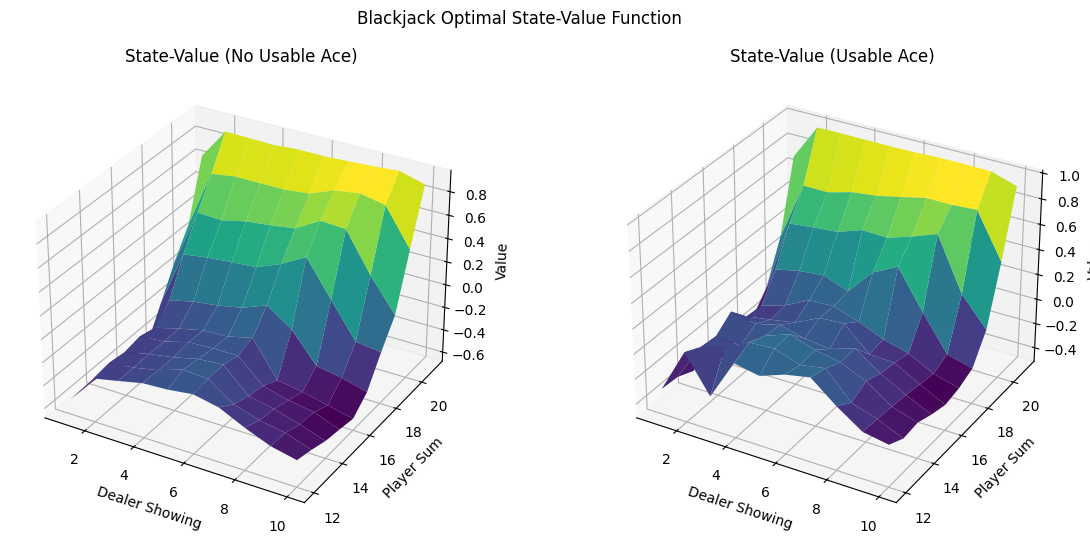

In [ ]:
# This is the completed version of the structured code snippet you provided.
# It includes both policy evaluation and policy control for the Blackjack environment.

import gymnasium as gym
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from typing import Dict, Callable

def run_structured_blackjack():
    """
    Runs the complete, structured Monte Carlo algorithm for Blackjack.
    This version separates policy creation, evaluation, and control.
    """
    print("--- Running Structured Monte Carlo for Blackjack ---")

    # 1. Setup Environment
    env = gym.make("Blackjack-v1", sab=True)

    # ---------- Helper Functions ----------

    def make_epsilon_greedy_policy(Q: Dict, nA: int, epsilon: float) -> Callable:
        """
        Creates an epsilon-greedy policy function from a Q-value function.

        Args:
            Q (dict): A dictionary that maps from state -> action-values.
            nA (int): Number of actions in the environment.
            epsilon (float): The probability to select a random action.

        Returns:
            A function that takes a state and returns action probabilities.
        """
        def policy_fn(state):
            probs = np.ones(nA) * (epsilon / nA)
            # Use .get() to handle states not yet seen in Q
            q_vals = Q.get(state, np.zeros(nA))
            best_a = np.argmax(q_vals)
            probs[best_a] += (1.0 - epsilon)
            return probs
        return policy_fn

    def generate_episode(env, policy: Callable) -> list:
        """
        Generates one episode by following the given policy.

        Args:
            env: The gymnasium environment.
            policy: A function that takes a state and returns action probabilities.

        Returns:
            A list of (state, action, reward) tuples.
        """
        episode = []
        state, _ = env.reset()
        done = False
        while not done:
            probs = policy(state)
            action = np.random.choice(len(probs), p=probs)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            episode.append((state, action, reward))
            state = next_state
        return episode

    # ---------- Monte Carlo Control ----------

    def mc_control_epsilon_greedy(num_episodes=500000, gamma=1.0, epsilon=0.1):
        """
        Finds an optimal epsilon-greedy policy using Monte Carlo Control.

        Args:
            num_episodes (int): Number of episodes to sample.
            gamma (float): Discount factor.
            epsilon (float): Exploration rate.

        Returns:
            A tuple (Q, policy). Q is a dictionary of state-action values.
            Policy is a dictionary mapping state to the best action.
        """
        Q = defaultdict(lambda: np.zeros(env.action_space.n))
        returns_sum = defaultdict(float)
        returns_count = defaultdict(float)

        # The policy is continuously updated as Q improves
        policy_fn = make_epsilon_greedy_policy(Q, env.action_space.n, epsilon)

        for i_episode in range(1, num_episodes + 1):
            if i_episode % 100000 == 0:
                print(f"Episode {i_episode}/{num_episodes}")

            episode = generate_episode(env, policy_fn)

            G = 0
            visited_state_actions = set()

            # Work backwards through the episode
            for t in reversed(range(len(episode))):
                state, action, reward = episode[t]
                G = gamma * G + reward

                # First-visit MC
                if (state, action) not in visited_state_actions:
                    visited_state_actions.add((state, action))
                    returns_sum[(state, action)] += G
                    returns_count[(state, action)] += 1
                    # Update Q-value, which in turn updates the policy
                    Q[state][action] = returns_sum[(state, action)] / returns_count[(state, action)]

        # Create a deterministic policy from the final Q-values
        final_policy = {s: np.argmax(a) for s, a in Q.items()}
        return Q, final_policy

    # ---------- Visualization ----------

    def plot_value_function(Q, title="State-Value Function"):
        V = defaultdict(float)
        for state, actions in Q.items():
            V[state] = np.max(actions)

        player_range = np.arange(12, 22)
        dealer_range = np.arange(1, 11)
        X, Y = np.meshgrid(dealer_range, player_range)

        Z_no_ace = np.apply_along_axis(lambda a: V.get((a[1], a[0], False), 0), 2, np.dstack([X, Y]))
        Z_with_ace = np.apply_along_axis(lambda a: V.get((a[1], a[0], True), 0), 2, np.dstack([X, Y]))

        fig = plt.figure(figsize=(14, 6))
        ax1 = fig.add_subplot(121, projection='3d')
        ax1.plot_surface(X, Y, Z_no_ace, cmap='viridis')
        ax1.set_title('State-Value (No Usable Ace)')
        ax1.set_xlabel('Dealer Showing'); ax1.set_ylabel('Player Sum'); ax1.set_zlabel('Value')

        ax2 = fig.add_subplot(122, projection='3d')
        ax2.plot_surface(X, Y, Z_with_ace, cmap='viridis')
        ax2.set_title('State-Value (Usable Ace)')
        ax2.set_xlabel('Dealer Showing'); ax2.set_ylabel('Player Sum'); ax2.set_zlabel('Value')

        fig.suptitle(title)
        plt.show()

    # --- Run the Algorithm and Display Results ---

    final_Q, final_policy = mc_control_epsilon_greedy()
    plot_value_function(final_Q, "Blackjack Optimal State-Value Function")

    env.close()


# --- Main Execution ---
if __name__ == "__main__": # Corrected typo here
    run_structured_blackjack()